<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/AnaMariaSeguro/Parcial_AnaMSeguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Punto 4**

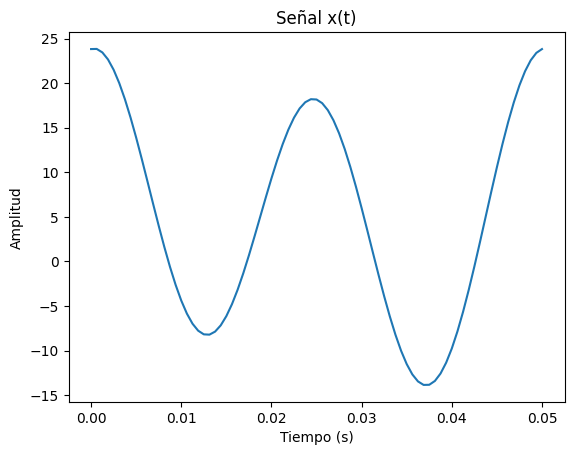

In [10]:
import numpy as np
import matplotlib.pyplot as plt

f = [20, 40]
T_senal = 1/f[0] #El periodo de la señal x se define con la frecuencia menor

fs_adecuada = max(f)**2
t = np.arange(0, T_senal + 1/fs_adecuada, 1/fs_adecuada)
k = 16

x_t = 4 * np.sin(40*np.pi*t + np.pi/4) + k*np.cos(80*np.pi*t) + 5

plt.plot(t, x_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal x(t)')
plt.show()

**Punto 5**

In [12]:
import numpy as np

def welch_periodogram(x, M, S, w):
    #Punto A)
    N = len(x)
    step = M - S
    num_segments = (N - S) // step
    Pxx_total = np.zeros(M)

    #Punto B)
    for i in range(num_segments):
        start_idx = i * step
        segment = x[start_idx:start_idx + M]
        windowed_segment = segment * w
        dft = np.fft.fft(windowed_segment, n=M)
        periodogram = (np.abs(dft) ** 2) / (M * np.sum(w ** 2)) #Punto C)
        Pxx_total += periodogram

    #Punto D)
    Pxx = Pxx_total / num_segments
    f = np.fft.fftfreq(M, d=1.0)[:M // 2]
    return f, Pxx[:M // 2]

**Punto 6**

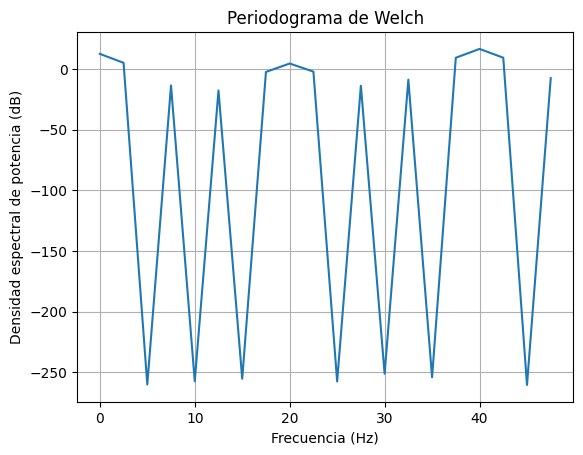

In [13]:
import matplotlib.pyplot as plt

fs = 100
t = np.arange(0, 10, 1 / fs)
x = 4 * np.sin(40 * np.pi * t + np.pi / 4) + 16 * np.cos(80 * np.pi * t) + 5

M = 40
S = 20
w = np.bartlett(M)
f, Pxx = welch_periodogram(x, M, S, w)

plt.plot(f * fs, 10 * np.log10(Pxx))
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD")
plt.grid()
plt.show()

**Punto 7**